<a href="https://colab.research.google.com/github/giacomoaccursi/DataIntensiveExercise/blob/main/HTRU2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Visualization**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from torchvision.datasets.utils import download_url
import zipfile
data_url="https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"
download_url(data_url, ".")
with zipfile.ZipFile("./HTRU2.zip", 'r') as zip_ref:
    zip_ref.extractall(".")
!rm -rf HTRU2.zip Readme.txt

In [ ]:
data = pd.read_csv("HTRU_2.csv", header=None)

In [ ]:
data

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [ ]:
data.columns = ['Mean_of_the_integrated_profile',
'Standard_deviation_of_the_integrated_profile',
'Excess_kurtosis_of_the_integrated_profile',
'Skewness_of_the_integrated_profile',
'Mean_of_the_DM_SNR_curve',
'Standard_eviation_of_the_DM_SNR_curve',
'Excess_kurtosis_of_the_DM_SNR_curve',
'Skewness_of_the_DM_SNR_curve',
'target_class']

In [ ]:
data

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_eviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [ ]:
data.isnull().sum()

Mean_of_the_integrated_profile                  0
Standard_deviation_of_the_integrated_profile    0
Excess_kurtosis_of_the_integrated_profile       0
Skewness_of_the_integrated_profile              0
Mean_of_the_DM_SNR_curve                        0
Standard_eviation_of_the_DM_SNR_curve           0
Excess_kurtosis_of_the_DM_SNR_curve             0
Skewness_of_the_DM_SNR_curve                    0
target_class                                    0
dtype: int64

In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

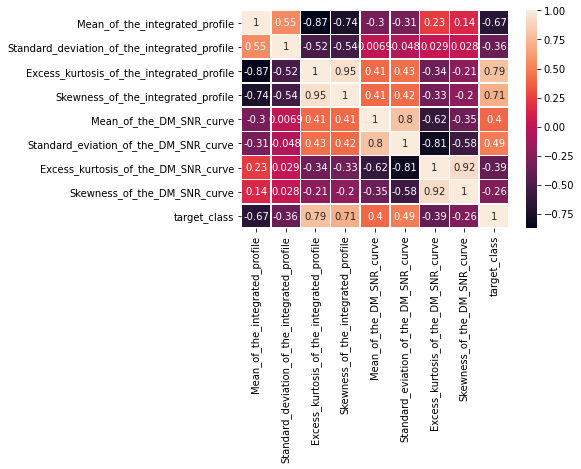

In [ ]:
sns.heatmap(data.corr(), annot = True, linewidths=.5)

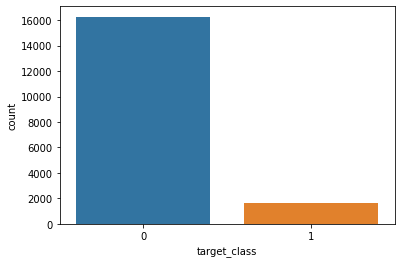

In [ ]:
sns.countplot(x = "target_class", data = data)

In [ ]:
X = data.drop("target_class", axis = 1)

In [ ]:
y = data["target_class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, stratify=y, random_state=42)

In [ ]:
def standardScaling(feature):
   feat_col = feature.columns
   scaler = StandardScaler().fit(feature)
   scaled_feature = scaler.transform(feature)
   scaled_feat = pd.DataFrame(data = scaled_feature, columns = feat_col)
   return scaled_feat
   
X_train_scaled = standardScaling(X_train)
X_test_scaled = standardScaling(X_test)
X_train_scaled.head()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_eviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve
0,0.673591,0.026911,-0.597820,-0.271873,-0.331606,-0.529520,0.042171,-0.086674
1,-0.283140,0.411721,-0.229219,-0.277408,-0.190168,0.328051,-0.699082,-0.725860
2,0.816840,0.394688,-0.777371,-0.349845,-0.342032,-0.516297,0.106529,-0.111779
3,-0.298477,-0.306567,-0.083825,-0.244174,0.172087,1.363235,-1.208637,-0.917597
4,2.072951,1.453710,-1.407064,-0.199011,6.532403,1.714235,-2.188798,-0.964167


In [ ]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[5379,   41],
       [  76,  470]])

In [ ]:
f1_score(y_test, y_pred)

0.8893093661305581

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5420
           1       0.92      0.86      0.89       546

    accuracy                           0.98      5966
   macro avg       0.95      0.93      0.94      5966
weighted avg       0.98      0.98      0.98      5966



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_log = log_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5420
           1       0.94      0.82      0.88       546

    accuracy                           0.98      5966
   macro avg       0.96      0.91      0.93      5966
weighted avg       0.98      0.98      0.98      5966



In [ ]:
f1_score(y_test, y_pred)

0.8893093661305581